In [220]:
import pandas as pd

In [247]:
res_hr = pd.read_csv('../results/hr/from_scratch_bleu_eval_scores.csv')
res_hr['seed'] = res_hr['model'].apply(lambda x: x.split('_')[-1])
res_hr['model'] = res_hr['model'].apply(lambda x: "_".join(x.split('_')[:-1]))

res_hr = res_hr.groupby(['model', 'test_file']).agg({'bleu': ['mean', 'std']})

# drop the top level of the multiindex
res_hr.columns = res_hr.columns.droplevel(0)
res_hr = res_hr.reset_index()
# # compute the sum of the estimated variances per model per test_file
res_hr['variance'] = res_hr['std'] ** 2
res_hr = res_hr.groupby(['model', 'test_file']).agg({'variance': 'sum'}).reset_index()
# pivot the table to have the test_files as columns
res_hr = res_hr.pivot(index='model', columns='test_file', values='variance').reset_index()

# add the values in the first row to the values in each row
var = res_hr.add(res_hr.iloc[0], axis=1)
# remove first row
# var = var.iloc[1:]



In [253]:
res_hr = pd.read_csv('../results/hr/from_scratch_bleu_scores.csv')
# combine as strings bleu_mean rounded to 2 decimals +- bleu_std rounded to 2 decimals
# res_hr['bleu'] = res_hr['bleu_mean'].round(2).astype(str) + ' +- ' + res_hr['bleu_std'].round(2).astype(str)
res_hr['bleu'] = res_hr['bleu_mean'].round(2)
# pivot
# opus= pd.read_csv('../results/hr/opus_bleu_scores.csv')
# opus['bleu'] = opus['bleu_mean']
# res_hr = pd.concat([res_hr,opus])
res_hr = res_hr.pivot(index='model', columns='test_file', values='bleu')
res_hr 

test_file,MaCoCu,floresdev,floresdevtest,wmttest2022
model,,,,
baseline,19.90,18.03,18.67,14.00
genre_aware,19.93,18.03,18.43,13.97
genre_aware_token,20.00,17.80,18.17,14.07
tok_baseline,19.93,18.23,18.27,14.07
tok_genre_aware,19.93,18.03,18.50,14.00
tok_genre_aware_token,19.13,17.37,17.77,13.27


In [254]:
# compute difference between all rows and the first row
res_hr = res_hr.sub(res_hr.iloc[0], axis=1).round(2)
# change index values
res_hr.index = ['baseline', 'Genre Aware', 'Genre Aware +\n Token', 'Tokenizer +\n Baseline', 'Tokenizer +\n Genre Aware', 'Tokenizer +\n Genre Aware +\n Token']
res_hr

test_file,MaCoCu,floresdev,floresdevtest,wmttest2022
baseline,0.00,0.00,0.00,0.00
Genre Aware,0.03,0.00,-0.24,-0.03
Genre Aware +\n Token,0.10,-0.23,-0.50,0.07
Tokenizer +\n Baseline,0.03,0.20,-0.40,0.07
Tokenizer +\n Genre Aware,0.03,0.00,-0.17,0.00
Tokenizer +\n Genre Aware +\n Token,-0.77,-0.66,-0.90,-0.73


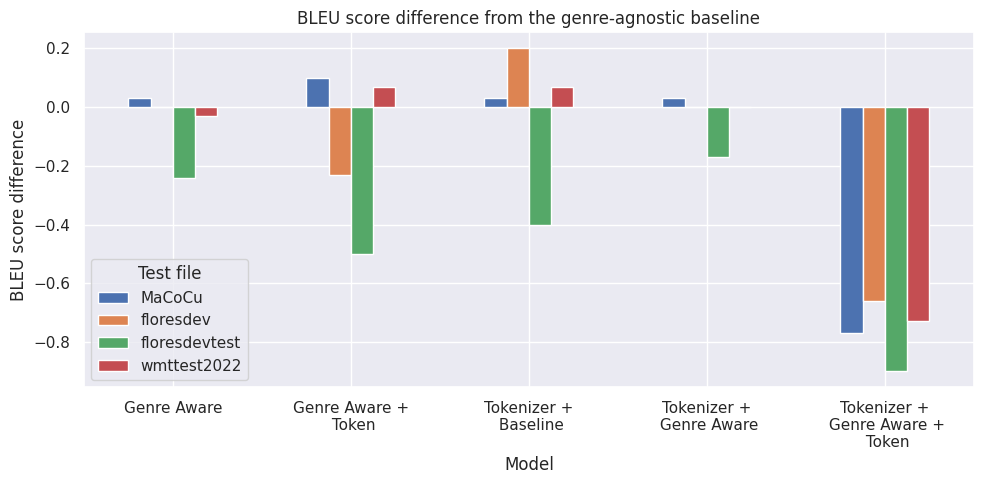

In [269]:
# make a bar chart
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.transforms import Affine2D
# remove the first row
res_hr.iloc[1:].plot(kind='bar', figsize=(10,5))
# add error bars from var and move them so they don;t overlap
# transf = [Affine2D().translate(-0.17, 0), Affine2D().translate(-0.07, 0), Affine2D().translate(0.07, 0), Affine2D().translate(0.17, 0)]
# for i, test_file in enumerate(res_hr.columns):
#     plt.errorbar(x=res_hr.index, y=res_hr[test_file], yerr=var[test_file]**0.5, fmt='o', label=test_file, transform=transf[i] + plt.gca().transData, capsize=5, capthick=2, elinewidth=2, linestyle='None')

plt.title('BLEU score difference from the genre-agnostic baseline')
plt.ylabel('BLEU score difference')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Test file')
plt.show()


In [3]:
res_hr = pd.read_csv('../results/hr/from_scratch_comet_scores.csv')
# combine as strings comet_mean * 100 rounded to 2 decimals +- comet_std rounded to 2 decimals * 100
opus = pd.read_csv('../results/hr/opus_comet_scores.csv')
opus['comet'] = opus['comet_mean']
res_hr = pd.concat([res_hr,opus])
res_hr['comet'] = (res_hr['comet_mean']*100).round(2).astype(str) + ' +- ' + (res_hr['comet_std']*100).round(2).astype(str)
# pivot
res_hr = res_hr.pivot(index='model', columns='test_file', values='comet')
res_hr

test_file,MaCoCu,floresdev,floresdevtest,wmttest2022
model,,,,
baseline,77.35 +- 0.04,74.27 +- 0.07,74.25 +- 0.37,67.66 +- 0.28
baseline_op,81.06 +- nan,81.93 +- nan,81.23 +- nan,78.1 +- nan
genre_aware,77.15 +- 0.12,74.4 +- 0.29,74.48 +- 0.1,67.43 +- 0.17
genre_aware_token,77.17 +- 0.04,74.49 +- 0.27,74.36 +- 0.21,67.47 +- 0.11
tok_baseline,77.44 +- 0.11,74.18 +- 0.21,74.06 +- 0.3,67.37 +- 0.06
tok_genre_aware,77.15 +- 0.09,73.78 +- 0.16,73.73 +- 0.18,67.07 +- 0.16
tok_genre_aware_token,75.38 +- 0.23,72.39 +- 0.35,72.13 +- 0.3,64.71 +- 0.09


In [68]:
res_hr = pd.read_csv('../results/hr/from_scratch_comet_scores_per_genre.csv')
# only keep models baseline and genre_aware_token
# res_hr = res_hr[res_hr['model'].isin(['baseline', 'genre_aware_token'])]
# only keep results on MaCoCu
opus = pd.read_csv('../results/hr/opus_comet_scores_per_genre.csv')
opus['comet'] = opus['comet_mean']
res_hr = pd.concat([res_hr,opus])
res_hr = res_hr[res_hr['test_file'] == 'floresdevtest']
# aggregate over genres test files and models
# comet_mean * 100
res_hr['comet_mean'] = res_hr['comet_mean']*100
res_hr = res_hr.groupby(['model', 'genre', 'test_file']).agg({'comet_mean': ['mean', 'std']})
# drop level 1 of multiindex
res_hr.columns = res_hr.columns.droplevel(0)
#reste index
res_hr = res_hr.reset_index()
# combine as strings comet_mean * 100 rounded to 2 decimals +- comet_std rounded to 2 decimals * 100
res_hr['comet'] = (res_hr['mean']).round(2).astype(str) + ' +- ' + (res_hr['std']).round(2).astype(str)
# pivot
res_hr = res_hr.pivot(index='model', columns='genre', values='comet')
res_hr

genre,Forum,Information/Explanation,Instruction,News,Opinion/Argumentation,Other,Promotion
model,,,,,,,
baseline,60.39 +- 1.82,77.09 +- 0.72,75.97 +- 0.32,68.96 +- 0.68,75.23 +- 0.59,70.18 +- 2.0,72.62 +- 0.43
baseline_op,71.68 +- nan,81.28 +- nan,80.92 +- nan,81.19 +- nan,82.16 +- nan,74.73 +- nan,79.86 +- nan
genre_aware,65.51 +- 6.09,77.39 +- 0.38,75.96 +- 0.57,69.38 +- 0.18,74.67 +- 0.25,70.8 +- 4.47,73.28 +- 0.52
genre_aware_token,65.58 +- 3.04,76.9 +- 0.15,76.46 +- 0.79,69.49 +- 0.16,74.72 +- 0.34,69.18 +- 1.3,73.77 +- 1.72
tok_baseline,53.0 +- 0.96,77.04 +- 0.54,74.96 +- 0.6,69.12 +- 0.24,74.29 +- 1.03,72.75 +- 3.98,73.45 +- 0.48
tok_genre_aware,59.46 +- 5.26,76.65 +- 0.34,74.6 +- 0.36,68.91 +- 0.38,73.96 +- 0.99,70.6 +- 0.64,72.73 +- 2.96
tok_genre_aware_token,54.34 +- 7.29,75.0 +- 0.16,72.86 +- 0.73,67.4 +- 0.69,72.51 +- 1.0,72.54 +- 1.19,70.4 +- 1.84


In [17]:
# fine-tuning results
res_hr = pd.read_csv('../results/hr/fine_tune_bleu_scores.csv')
# remove rows with genre_aware_token_opus
res_hr = res_hr[~res_hr['model'].str.contains('genre_aware_token_opus')]
# combine as strings bleu_mean rounded to 2 decimals +- bleu_std rounded to 2 decimals
res_hr['bleu'] = res_hr['bleu_mean'].round(2).astype(str) + ' +- ' + res_hr['bleu_std'].round(2).astype(str)
# make train file column by splitting the model name
res_hr['train_file'] = res_hr['model'].apply(lambda x: x.split("_")[-1])
res_hr['model'] = res_hr['model'].apply(lambda x: "_".join(x.split("_")[:-1]))
# pivot
res_hr = res_hr.pivot(index=['model','train_file'], columns=['test_file'], values='bleu')
res_hr


test_file                            MaCoCu      floresdev  floresdevtest  \
model             train_file                                                
baseline          arg           17.9 +- 0.0  16.55 +- 0.21  16.85 +- 0.07   
                  info          18.0 +- 0.0  16.27 +- 0.31    16.8 +- 0.3   
                  law         15.07 +- 0.06   12.2 +- 0.26  12.67 +- 0.25   
                  news        18.03 +- 0.12   16.4 +- 0.26  17.23 +- 0.06   
                  promo       17.85 +- 0.07    15.1 +- 0.2    15.7 +- 0.2   
                  random      19.05 +- 0.07  17.03 +- 0.15  17.23 +- 0.35   
baseline_opus     arg           23.3 +- 0.0  24.07 +- 0.21  24.27 +- 0.25   
                  info        23.63 +- 0.06    24.4 +- 0.1  24.47 +- 0.21   
                  law           20.4 +- 0.0  19.77 +- 0.49   20.0 +- 0.36   
                  news        23.47 +- 0.06  24.27 +- 0.15  24.13 +- 0.15   
                  promo         23.3 +- 0.1  22.93 +- 0.23  22.77 +- 0.12   
                  random        24.6 +- 0.0  25.17 +- 0.21   25.2 +- 0.26   
genre_aware_token arg          17.4 +- 0.17   16.2 +- 0.35  16.57 +- 0.21   
                  info        17.63 +- 0.21   16.2 +- 0.17  16.93 +- 0.12   
                  law         14.83 +- 0.06    12.2 +- 0.1  12.77 +- 0.12   
                  news        17.53 +- 0.06    16.3 +- 0.1  16.37 +- 0.47   
                  promo       17.57 +- 0.15  14.63 +- 0.31  15.03 +- 0.35   
                  random        19.2 +- 0.0  17.13 +- 0.15  17.35 +- 0.07   

test_file                       wmttest2022  
model             train_file                 
baseline          arg         13.25 +- 0.07  
                  info        11.87 +- 0.23  
                  law            8.5 +- 0.2  
                  news        13.07 +- 0.21  
                  promo       11.37 +- 0.23  
                  random      12.83 +- 0.06  
baseline_opus     arg         21.03 +- 0.12  
                  info        20.47 +- 0.06  
                  law           16.2 +- 0.1  
                  news        21.13 +- 0.12  
                  promo       19.03 +- 0.32  
                  random      21.37 +- 0.15  
genre_aware_token arg         12.87 +- 0.06  
                  info        11.53 +- 0.21  
                  law            8.5 +- 0.2  
                  news        12.77 +- 0.12  
                  promo       10.87 +- 0.12  
                  random        13.1 +- 0.2

In [3]:
# fine-tuning results
res_hr = pd.read_csv('../results/hr/fine_tune_comet_scores_per_genre.csv')
# remove rows with genre_aware_token_opus
res_hr = res_hr[~res_hr['model'].str.contains('genre_aware_token')]
# make train file column by splitting the model name
res_hr['train_file'] = res_hr['model'].apply(lambda x: x.split("_")[-1])
res_hr['model'] = res_hr['model'].apply(lambda x: "_".join(x.split("_")[:-1]))

res_hr['comet_mean'] = res_hr['comet_mean']*100
res_hr = res_hr.groupby(['model', 'genre', 'test_file', 'train_file']).agg({'comet_mean': ['mean', 'std']})
# drop level 1 of multiindex
res_hr.columns = res_hr.columns.droplevel(0)
#reste index
res_hr = res_hr.reset_index()
# combine as strings comet_mean * 100 rounded to 2 decimals +- comet_std rounded to 2 decimals * 100
res_hr['comet'] = (res_hr['mean']).round(2).astype(str) + ' +- ' + (res_hr['std']).round(2).astype(str)
res_hr['mean'] = res_hr['mean'].round(2)
# pivot
res_hr = res_hr[res_hr['test_file']=='floresdevtest']
#remove seed

res_hr = res_hr.pivot(index=['model','train_file'], columns=['genre'], values='mean').sort_index(axis='columns')

res_hr=res_hr[[ 'Opinion/Argumentation', 'Information/Explanation', 'News', 'Promotion', 'Forum', 'Instruction', 'Other']]
res_hr

genre                     Opinion/Argumentation  Information/Explanation  \
model         train_file                                                   
baseline      arg                         76.47                    74.51   
              info                        71.77                    75.68   
              law                         63.59                    61.01   
              news                        71.94                    73.59   
              promo                       70.16                    70.71   
              random                      72.63                    75.00   
baseline_opus arg                         86.56                    86.01   
              info                        86.68                    86.88   
              law                         79.81                    77.49   
              news                        85.38                    85.50   
              promo                       85.70                    84.45   
              random                      87.17                    86.45   

genre                      News  Promotion  Forum  Instruction  Other  
model         train_file                                               
baseline      arg         67.62      73.23  65.79        72.80  73.48  
              info        65.58      73.10  55.01        73.16  73.02  
              law         56.32      53.14  53.16        66.28  59.14  
              news        69.37      68.46  67.21        72.36  71.72  
              promo       59.28      69.84  52.14        71.25  70.64  
              random      65.82      73.26  64.95        74.75  70.83  
baseline_opus arg         83.17      83.95  74.61        85.20  80.64  
              info        83.76      84.17  76.49        86.01  76.91  
              law         74.09      70.31  73.14        81.83  70.11  
              news        84.66      83.69  75.88        85.00  82.46  
              promo       79.12      82.85  76.38        84.70  79.60  
              random      83.81      84.35  73.84        86.80  79.24

In [24]:
# show opus scores per genre
opus = pd.read_csv('../results/hr/opus_comet_scores_per_genre.csv')
# opus['comet_mean'] = round(opus['comet_mean']*100,2)
# opus['comet_std'] = round(opus['comet_std']*100,2)
opus['comet'] = opus['comet_mean'].round(2).astype(str) + ' +- ' + opus['comet_std'].round(2).astype(str)
# remove comet_mean and comet_std columns, model and seed
opus = opus.drop(columns=['comet_mean', 'comet_std', 'model', 'seed'])
# opus = opus.groupby(['model', 'genre', 'test_file']).agg({'comet_mean': ['mean']})
# opus.columns = opus.columns.droplevel(0)
# opus = opus.reset_index()
# opus['comet'] = (opus['mean']).round(2).astype(str)
opus = opus.pivot(index='test_file', columns='genre', values='comet')
opus


genre,Forum,Information/Explanation,Instruction,Legal,News,Opinion/Argumentation,Other,Promotion,Prose/Lyrical
test_file,,,,,,,,,
MaCoCu,0.81 +- 0.13,0.82 +- 0.12,0.83 +- 0.12,0.81 +- 0.12,0.83 +- 0.12,0.81 +- 0.13,NaN,0.83 +- 0.12,0.74 +- 0.15
floresdev,0.88 +- 0.03,0.82 +- 0.12,0.82 +- 0.1,NaN,0.81 +- 0.12,0.8 +- 0.12,0.78 +- 0.04,0.85 +- 0.07,NaN
floresdevtest,0.72 +- 0.27,0.81 +- 0.11,0.81 +- 0.12,NaN,0.81 +- 0.12,0.82 +- 0.11,0.75 +- 0.12,0.8 +- 0.12,NaN
wmttest2022,0.8 +- 0.15,0.78 +- 0.15,0.78 +- 0.16,NaN,0.77 +- 0.15,0.78 +- 0.16,0.83 +- 0.09,0.76 +- 0.18,NaN


In [91]:
# show opus scores per genre for is
opus = pd.read_csv('../results/is/opus_comet_scores_per_genre.csv')
opus['comet'] = round(opus['comet_mean']*100,2)
# opus['comet'] = opus['comet_mean'].round(2).astype(str) + ' +- ' + opus['comet_std'].round(2).astype(str)
# remove comet_mean and comet_std columns, model and seed
opus = opus.drop(columns=['comet_mean', 'comet_std', 'model', 'seed'])
opus = opus.pivot(index='test_file', columns='genre', values='comet')
opus


genre,Forum,Information/Explanation,Instruction,Legal,News,Opinion/Argumentation,Other,Promotion,Prose/Lyrical
test_file,,,,,,,,,
MaCoCu,71.39,76.09,74.57,77.88,77.56,73.32,NaN,73.91,70.98
floresdev,79.18,78.10,75.51,NaN,73.85,71.86,61.66,78.75,NaN
floresdevtest,72.00,77.27,76.40,NaN,73.45,76.85,80.41,75.18,NaN
wmttest2021,NaN,59.94,NaN,NaN,69.88,66.52,NaN,NaN,NaN


In [69]:
#show is scores for all models fine-tuned on is
res_is = pd.read_csv('../results/is/fine_tune_comet_scores.csv')
# remove rows with genre_aware_token_opus
# res_is = res_is[~res_is['model'].str.contains('genre_aware_token_opus')]
# combine as strings comet_mean * 100 rounded to 2 decimals +- comet_std rounded to 2 decimals * 100
res_is['comet'] = (res_is['comet_mean']*100).round(2).astype(str) + ' +- ' + (res_is['comet_std']*100).round(2).astype(str)
# pivot
res_is = res_is.pivot(index='model', columns='test_file', values='comet')
res_is

test_file,MaCoCu,floresdev,floresdevtest,wmttest2021
model,,,,
baseline_opus_info,78.82 +- 0.02,77.01 +- 0.24,76.88 +- 0.28,71.74 +- 0.4
baseline_opus_law,75.55 +- 0.15,70.18 +- 0.25,69.89 +- 0.17,66.83 +- 0.25
baseline_opus_news,78.63 +- 0.13,76.09 +- 0.57,75.48 +- 0.19,72.28 +- 0.02
baseline_opus_promo,78.42 +- 0.13,75.25 +- 0.16,75.03 +- 0.1,69.29 +- 0.09
baseline_opus_random,79.75 +- nan,77.33 +- 0.48,77.13 +- 0.27,72.25 +- 0.35
genre_aware_opus,75.11 +- 0.0,78.16 +- 0.11,77.97 +- 0.2,73.86 +- 0.11
genre_aware_token_opus,74.45 +- 0.19,78.57 +- 0.19,78.33 +- 0.3,74.09 +- 0.25


In [314]:
opus = pd.read_csv('../results/hr/opus_comet_scores_per_genre.csv')
opus

,model,test_file,genre,comet_mean,comet_std,seed
0,baseline_op,floresdevtest,Forum,0.716850,0.273721,s
1,baseline_op,floresdevtest,Information/Explanation,0.812805,0.113895,s
2,baseline_op,floresdevtest,Instruction,0.809192,0.121902,s
3,baseline_op,floresdevtest,News,0.811942,0.120486,s
4,baseline_op,floresdevtest,Opinion/Argumentation,0.821551,0.110273,s
5,baseline_op,floresdevtest,Other,0.747275,0.118887,s
6,baseline_op,floresdevtest,Promotion,0.798613,0.115786,s
7,baseline_op,wmttest2022,Forum,0.798641,0.152998,s
8,baseline_op,wmttest2022,Information/Explanation,0.775150,0.145707,s
9,baseline_op,wmttest2022,Instruction,0.778512,0.161647,s


In [317]:
res_is = pd.read_csv('../results/hr/fine_tune_comet_scores_per_genre.csv')
res_is.model.unique()

array(['baseline_promo', 'genre_aware_token_arg', 'baseline_info',
       'baseline_opus_random', 'baseline_opus_law',
       'genre_aware_token_law', 'genre_aware_token_opus_arg',
       'baseline_law', 'genre_aware_token_info', 'baseline_opus_promo',
       'genre_aware_token_opus_promo', 'baseline_opus_news',
       'baseline_opus_info', 'genre_aware_token_news', 'baseline_news',
       'baseline_arg', 'genre_aware_token_opus_info',
       'genre_aware_token_opus_news', 'baseline_random',
       'genre_aware_token_random', 'genre_aware_token_opus_law',
       'genre_aware_token_promo', 'baseline_opus_arg'], dtype=object)

In [412]:

res_is = pd.read_csv('../results/hr/fine_tune_comet_scores_per_genre.csv')
opus = pd.read_csv('../results/hr/opus_comet_scores_per_genre.csv')
# rename model in opus to opus
opus['model'] = 'opus'
res_is = pd.concat([res_is,opus])

res_is['comet_mean'] = res_is['comet_mean']*100
res_is = res_is.groupby(['model', 'genre', 'test_file']).agg({'comet_mean': ['mean', 'std']})
# drop level 1 of multiindex
res_is.columns = res_is.columns.droplevel(0)
#reste index
res_is = res_is.reset_index()
# combine as strings comet_mean * 100 rounded to 2 decimals +- comet_std rounded to 2 decimals * 100
res_is['comet'] = (res_is['mean']).round(2)
res_is['train_file'] = res_is['model'].apply(lambda x: x.split("_")[-1] if 'baseline' in x else 'MaCoCu')
res_is['model'] = res_is['model'].apply(lambda x: "_".join(x.split("_")[:-1]) if 'baseline' in x else x)
# only keep baseline and baseline_opus
res_is = res_is[res_is['model'].isin(['baseline_opus', 'opus'])]
# opus to baseline
res_is['model'] = res_is['model'].apply(lambda x: 'baseline' if x=='opus' else x)

# pivot


In [413]:
res_is = res_is[res_is['test_file']=='MaCoCu']
# # pivot
res_is = res_is.pivot(index=['model','train_file'], columns='genre', values='comet')
# res_is=res_is[[ 'Information/Explanation',  'Legal', 'News']]
# res_is=res_is[[ 'Information/Explanation','News', 'Promotion']]
# res_is=res_is[[ 'Information/Explanation', 'Legal','News', 'Promotion']]
# only keeo baseline and baseline_opus
# res_is = res_is[res_is['model'].isin(['baseline','baseline_opus'])]
res_is


genre                     Forum  Information/Explanation  Instruction  Legal  \
model         train_file                                                       
baseline      MaCoCu      80.51                    82.38        82.59  80.61   
baseline_opus arg         83.77                    87.12        85.36  87.71   
              info        83.97                    87.81        86.20  89.33   
              law         80.13                    81.52        83.55  91.25   
              news        83.08                    87.12        85.18  89.19   
              promo       83.80                    86.62        86.46  88.69   
              random      84.75                    87.97        87.12  90.77   

genre                      News  Opinion/Argumentation  Promotion  \
model         train_file                                            
baseline      MaCoCu      83.00                  81.30      83.11   
baseline_opus arg         88.19                  85.26      87.23   
              info        88.06                  84.76      87.69   
              law         83.80                  77.73      83.56   
              news        88.90                  84.87      87.27   
              promo       87.43                  83.68      89.06   
              random      88.74                  85.25      88.67   

genre                     Prose/Lyrical  
model         train_file                 
baseline      MaCoCu              74.33  
baseline_opus arg                 77.85  
              info                76.28  
              law                 62.06  
              news                74.98  
              promo               72.56  
              random              76.46

In [415]:
dif = pd.DataFrame(columns=res_is.loc['baseline_opus'].columns, index=res_is.loc['baseline_opus'].index)
for row in res_is.loc['baseline_opus'].index:
    # add a row with the difference between the baseline and the baseline_opus
    # print(res_is.loc['baseline'].values[0])
    # print(res_is.loc['baseline_opus'].loc[row].values)
    dif.loc[row] = res_is.loc['baseline_opus'].loc[row].values - res_is.loc['baseline'].values[0]
# rename index'
dif.index = ['Opinion/Argumentation', 'Information/Explanation', 'Legal','News', 'Promotion', 'Random']
# remove the legal row
# dif = dif.drop(index='Legal')
# remove columns for Forum, Instruction and Other
dif = dif.drop(columns=['Forum', 'Instruction'])
# reorder columns
dif = dif[['Opinion/Argumentation', 'Information/Explanation', "Legal", 'News', 'Promotion']]
dif.astype(float)

genre,Opinion/Argumentation,Information/Explanation,Legal,News,Promotion
Opinion/Argumentation,3.96,4.74,7.10,5.19,4.12
Information/Explanation,3.46,5.43,8.72,5.06,4.58
Legal,-3.57,-0.86,10.64,0.80,0.45
News,3.57,4.74,8.58,5.90,4.16
Promotion,2.38,4.24,8.08,4.43,5.95
Random,3.95,5.59,10.16,5.74,5.56


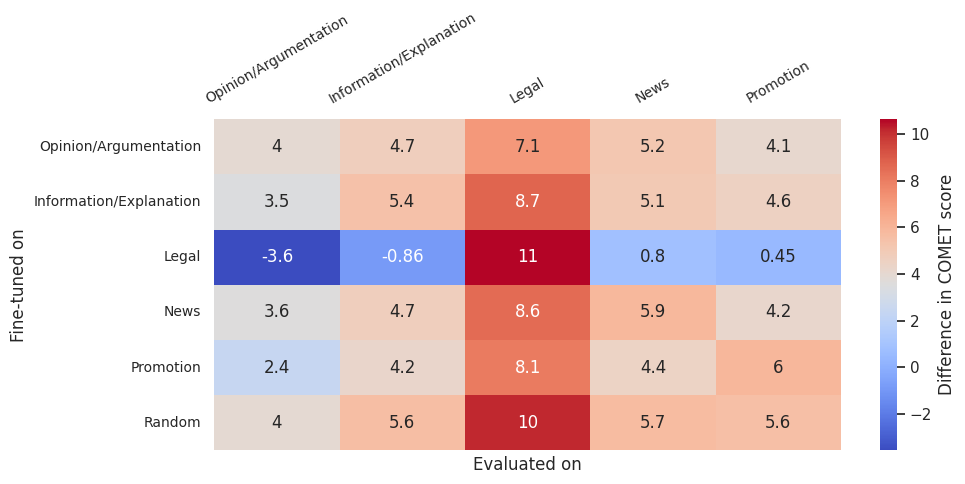

In [416]:
# make a heat map
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))


sns.heatmap(dif.astype(float), annot=True, cmap='coolwarm', cbar_kws={'label': 'Difference in COMET score'})
# plt.title('Difference in comet scores between baseline_opus and baseline fine-tuned on MaCoCu')
# move the x-ticks on top of the plot

plt.yticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=30)
# no ticks on the y-axis
plt.tight_layout()
plt.xlabel('Evaluated on')
plt.ylabel('Fine-tuned on')
plt.show()

,model,test_file,bleu_mean,bleu_std
0,baseline_op,MaCoCu,16.2,NaN
1,baseline_op,floresdev,16.7,NaN
2,baseline_op,floresdevtest,16.8,NaN
3,baseline_op,wmttest2022,15.9,NaN


In [424]:
opus

,model,test_file,bleu_mean,bleu_std
0,opus,MaCoCu,14.8,NaN
1,opus,floresdev,18.7,NaN
2,opus,floresdevtest,18.3,NaN
3,opus,wmttest2021,15.0,NaN


In [438]:
var

test_file,MaCoCu,floresdev,floresdevtest,wmttest2021
model,,,,
baseline_opus,0.1,0.208167,0.404145,0.11547
genre_aware_opus,0.0,0.115470,0.264575,0.20000
genre_aware_token_opus,0.0,0.100000,0.115470,0.11547
opus,NaN,NaN,NaN,NaN


In [454]:
var['wmttest2021']

model
baseline_opus             0.11547
genre_aware_opus          0.20000
genre_aware_token_opus    0.11547
Name: wmttest2021, dtype: float64

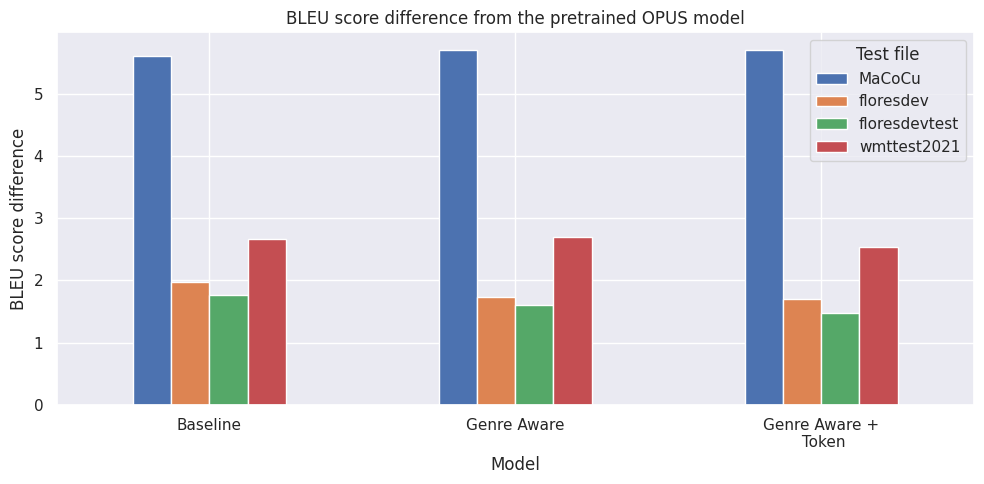

test_file,MaCoCu,floresdev,floresdevtest,wmttest2021
Baseline,5.6,1.97,1.77,2.67
Genre Aware,5.7,1.73,1.60,2.70
Genre Aware +\n Token,5.7,1.70,1.47,2.53


In [461]:
res = pd.read_csv('../results/is/fine_tune_bleu_scores.csv')
# only keep baseline_opus, genre_aware_token_opus and genre_aware_opus
opus = pd.read_csv('../results/is/opus_bleu_scores.csv')
opus['model'] = 'opus'
res = res[res['model'].isin(['baseline_opus', 'genre_aware_token_opus', 'genre_aware_opus'])]
res = pd.concat([res,opus])

var = res.pivot(index='model', columns='test_file', values='bleu_std')
var=var.iloc[:-1]


# pivot the table to have the test_files as columns
res = res.pivot(index='model', columns='test_file', values='bleu_mean')
# compute difference between all rows and the last row
res = res.sub(res.iloc[-1], axis=1).round(2)
# remove last row
res = res.iloc[:-1]
# change index values
res.index = ['Baseline', 'Genre Aware', 'Genre Aware +\n Token']

# plot a barchart
res.plot(kind='bar', figsize=(10,5))

# transf = [Affine2D().translate(-0.17, 0), Affine2D().translate(-0.07, 0), Affine2D().translate(0.07, 0), Affine2D().translate(0.17, 0)]
# for i, test_file in enumerate(res.columns):
#     print(var[test_file].values)
#     plt.errorbar(x=res_hr.index, y=res_hr[test_file].values, yerr=var[test_file][0], fmt='o', label=test_file, transform=transf[i] + plt.gca().transData, capsize=5, capthick=2, elinewidth=2, linestyle='None')

plt.title('BLEU score difference from the pretrained OPUS model')
plt.ylabel('BLEU score difference')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Test file')
plt.show()





res